# -------------------------------------------------
# WATER SAFETY CLASSIFICATION - FINAL PROJECT
# -------------------------------------------------

In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

# -------------------------------------------------
# 2. Load the Dataset

In [2]:
def load_data(filepath):
    return pd.read_csv(filepath)

df = load_data("C:\\Users\\NANNDITHA RAMESH\\Downloads\\waterQuality1.csv")

# -------------------------------------------------
# 3. Data Cleaning

In [3]:

def clean_data(df):
    df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
    df.dropna(inplace=True)
    df['is_safe'] = df['is_safe'].astype(int)  # <-- ADD THIS LINE
    return df

df = clean_data(df)

# -------------------------------------------------
# 4. Exploratory Data Analysis

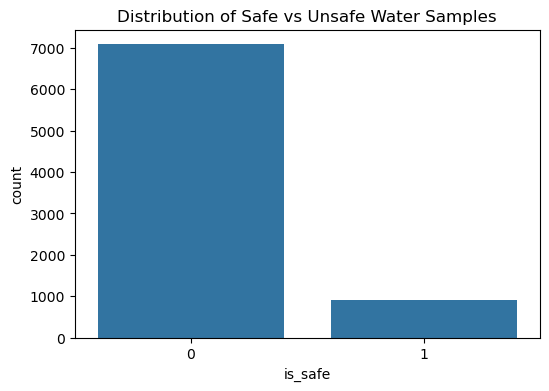

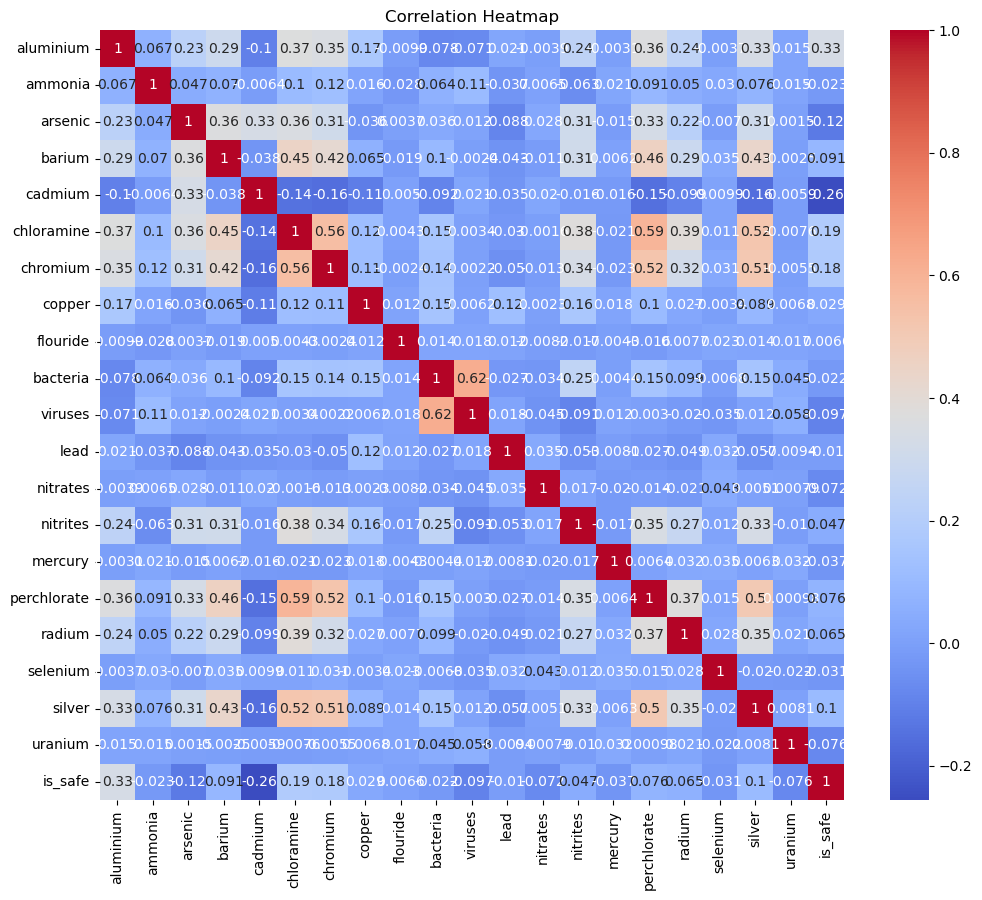

In [4]:
def perform_eda(df):
    # Target Distribution
    plt.figure(figsize=(6,4))
    sns.countplot(x='is_safe', data=df)
    plt.title('Distribution of Safe vs Unsafe Water Samples')
    plt.show()
    
    # Correlation Matrix
    plt.figure(figsize=(12,10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

perform_eda(df)

# -------------------------------------------------
# 5. Handling Class Imbalance

In [5]:
X = df.drop('is_safe', axis=1)
y = df['is_safe']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# -------------------------------------------------
# 6. Feature Scaling

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# -------------------------------------------------
# 7. Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# -------------------------------------------------
# 8. Define Model Training & Evaluation

In [8]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    print(f"\n--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------------------------
# 9. Compare Base Models

In [9]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    train_and_evaluate_model(model, name)


--- Logistic Regression Evaluation ---
Accuracy: 0.8045165843330981
Precision: 0.8075822603719599
Recall: 0.7984441301272984
F1 Score: 0.8029871977240398
ROC AUC Score: 0.8859628065422237

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1420
           1       0.81      0.80      0.80      1414

    accuracy                           0.80      2834
   macro avg       0.80      0.80      0.80      2834
weighted avg       0.80      0.80      0.80      2834

Confusion Matrix:
 [[1151  269]
 [ 285 1129]]

--- Decision Tree Evaluation ---
Accuracy: 0.9569513055751588
Precision: 0.9498607242339833
Recall: 0.9646393210749646
F1 Score: 0.9571929824561404
ROC AUC Score: 0.9569675478614259

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1420
           1       0.95      0.96      0.96      1414

    accuracy                           0.

# -------------------------------------------------
# 10. Hyperparameter Tuning (Random Forest)

In [11]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

print("\nBest Random Forest Hyperparameters:", grid_search.best_params_)


Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


# -------------------------------------------------
# 11. Evaluate Best Tuned Model

In [12]:
train_and_evaluate_model(best_rf_model, "Tuned Random Forest")


--- Tuned Random Forest Evaluation ---
Accuracy: 0.9763585038814396
Precision: 0.9660899653979239
Recall: 0.9872701555869873
F1 Score: 0.9765652325988108
ROC AUC Score: 0.9978385162459908

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1420
           1       0.97      0.99      0.98      1414

    accuracy                           0.98      2834
   macro avg       0.98      0.98      0.98      2834
weighted avg       0.98      0.98      0.98      2834

Confusion Matrix:
 [[1371   49]
 [  18 1396]]


# -------------------------------------------------
# 12. Save Final Model and Scaler

In [13]:
joblib.dump(best_rf_model, 'best_water_quality_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\n✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!
